In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [35]:
import pickle

data = {}
data['Normal'] = pickle.load(open('predictions/normal-sparse-static-normalised.pkl','r'))
data['Transfer'] = pickle.load(open('predictions/transfer-sparse-static-normalised.pkl','r'))
data['Joint'] = pickle.load(open('predictions/global-sparse-static-normalised.pkl','r'))

In [36]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

In [37]:
best_params = {
    'Normal':{'Without':0.1, 'With':0.01},
    'Transfer':{'Without':0.1, 'With':0.001},
    'Joint':{'Without':0,'With':0.001}
}

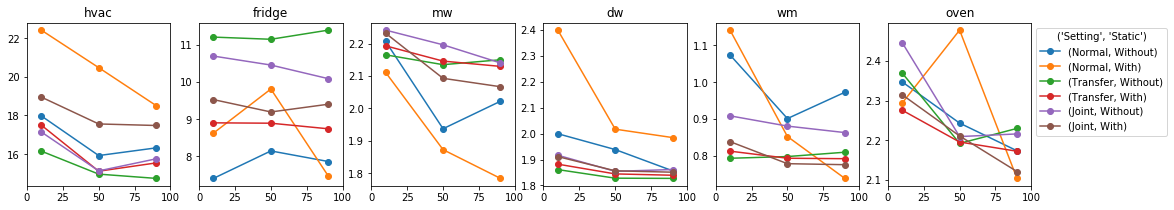

In [38]:
fig, ax = plt.subplots(figsize=(18, 3), ncols=6)
for setting in ['Normal','Transfer','Joint']:
    for static in ['Without', 'With']:
        if static=='Without':
            static_param = None
        else:
            static_param = 'static'
        df = pd.Panel(data[setting][static_param][best_params[setting][static]][2]).mean(axis=0)
        for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
            df[appliance].plot(ax=ax[i], title=appliance, label=(setting, static), marker='o')
            ax[i].set_xlim((0, 100))
plt.legend(bbox_to_anchor=(1,1), title=('Setting', 'Static'))

In [46]:
pd.Panel(data['Normal']['static'][best_params['Normal']['With']][2]).mean(axis=0)

,dw,fridge,hvac,mw,oven,wm
10,2.398705,8.627762,22.420433,2.111052,2.293516,1.141393
50,2.016917,9.811161,20.478524,1.873081,2.477936,0.852367
90,1.984527,7.475613,18.514502,1.784499,2.103115,0.738651


In [48]:
pd.Panel(data['Normal'][None][best_params['Normal']['With']][2]).mean(axis=0)

,dw,fridge,hvac,mw,oven,wm
10,2.102761,7.859291,19.301613,2.100703,2.441842,1.032927
50,1.984041,7.444513,16.676890,1.820663,2.226688,0.739819
90,1.932113,6.806438,16.303977,1.676773,2.116843,0.711745
